### Student Information
Name:林育陞

Student ID: 112034515

GitHub ID:  kevinyusheng

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [39]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import sys

import helpers.data_mining_helpers as dmh


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 2

## Data Preparation

In [40]:
import pandas as pd
df_amazon= pd.read_table('./Homework/sentiment labelled sentences/amazon_cells_labelled.txt',header=None)
df_imdb= pd.read_table('./Homework/sentiment labelled sentences/imdb_labelled.txt',header=None)
df_yelp= pd.read_table('./Homework/sentiment labelled sentences/yelp_labelled.txt',header=None)
df_amazon.columns = df_imdb.columns = df_yelp.columns = ["text", "label"]

In [41]:
df_amazon.iloc[0:2,:]

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [42]:
print('\n'.join(df_amazon.loc[2,'text'].split()))

Great
for
the
jawbone.


In [43]:
print("amazon data volume : " ,len(df_amazon))
print("imbd data volume : " ,len(df_imdb))
print("yelp data volume : " ,len(df_yelp))

amazon data volume :  1000
imbd data volume :  748
yelp data volume :  1000


In [44]:
df_all = pd.concat([df_amazon,df_imdb,df_yelp],
                   axis=0, ignore_index=True)
df_all

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


## DM with pandas

### check missing value

In [45]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
df_all.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


### check duplicated data

In [46]:
print("duplicate num : ",sum(df_all.duplicated('text')))
print("Before drop : ",len(df_all))
df_all.drop_duplicates(inplace=True)
print("After drop : ",len(df_all))

duplicate num :  17
Before drop :  2748
After drop :  2731


### Data Preprocessing

In [47]:
df_sample = df_all.sample(n = 1000)

label
1    1376
0    1355
Name: count, dtype: int64


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

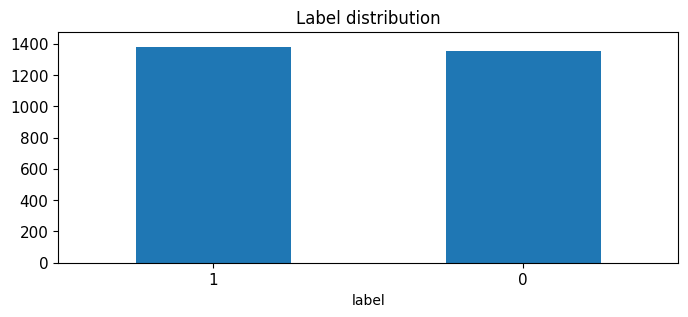

In [48]:
print(df_all.label.value_counts())

# plot barchart for X_sample
upper_limit=max(df_all.label.value_counts())+100
df_all.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, upper_limit],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label
1    503
0    497
Name: count, dtype: int64


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

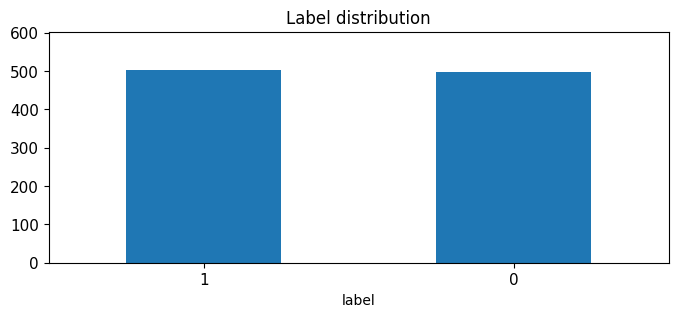

In [49]:
print(df_sample.label.value_counts())

# plot barchart for X_sample
upper_limit=max(df_sample.label.value_counts())+100
df_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, upper_limit],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

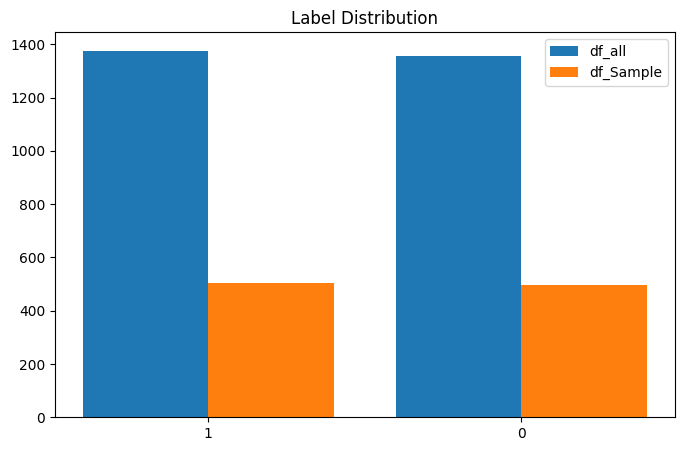

In [52]:
index = np.arange(2)

# Figure size
plt.figure(figsize=(8,5))

# Width of a bar 
width = 0.4     

# Plotting
plt.bar(index, df_all.label.value_counts() , width, label='df_all')
plt.bar(index + width, df_sample.label.value_counts(), width, label='df_Sample')

plt.title('Label Distribution')

plt.xticks(index + width /2, ('1','0'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Feature Creation

In [53]:
df_all['unigrams'] = df_all['text'].apply(lambda x: dmh.tokenize_text(x))

In [54]:
df_all.head()

,text,label,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


### Feature Subset Selection

In [55]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_all.text)

In [56]:
count_vect.get_feature_names_out()[0:5]

array(['00', '10', '100', '11', '12'], dtype=object)

In [57]:
df_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [62]:
# 慢慢調整term_filter的值，讓他選出較重要的單詞
term_sum = df_counts.toarray().sum(axis=0)
# adjust manually
term_word100 = (term_sum>100)

indexs=[]
for i in enumerate(term_word100):
    if i[1]==True:
        indexs.append(i[0])

values=[]
for i in indexs:
    values.append(count_vect.get_feature_names_out()[i])
    print(i," , ",count_vect.get_feature_names_out()[i]," : ",df_counts.toarray().sum(axis=0)[])

179  ,  all  :  149
214  ,  an  :  106
216  ,  and  :  1138
273  ,  are  :  180
297  ,  as  :  175
314  ,  at  :  135
373  ,  bad  :  103
416  ,  be  :  149
637  ,  but  :  201
1742  ,  film  :  163
1822  ,  food  :  125
1829  ,  for  :  334
1883  ,  from  :  103
1993  ,  good  :  230
2023  ,  great  :  204
2067  ,  had  :  138
2113  ,  have  :  184
2282  ,  if  :  103
2314  ,  in  :  400
2427  ,  is  :  752
2432  ,  it  :  789
2493  ,  just  :  119
2638  ,  like  :  124
2954  ,  movie  :  182
2982  ,  my  :  254
3063  ,  not  :  303
3097  ,  of  :  624
3122  ,  on  :  221
3124  ,  one  :  146
3322  ,  phone  :  164
3351  ,  place  :  112
3626  ,  really  :  103
3994  ,  service  :  108
4161  ,  so  :  171
4529  ,  that  :  316
4531  ,  the  :  1951
4545  ,  there  :  112
4548  ,  they  :  106
4558  ,  this  :  638
4593  ,  time  :  112
4609  ,  to  :  669
4890  ,  very  :  245
4968  ,  was  :  570
4993  ,  we  :  105
5015  ,  were  :  105
5069  ,  with  :  274
5138  ,  you  :  220


In [74]:
plot_z = []

for i in range(50):
    doc_freq = []
    for idx in indexs:
        doc_freq.append(df_counts[i, idx])
    plot_z.append(doc_freq)

plot_x = []
for i in values:
    plot_x.append("term_"+ str(i))
    
plot_y = ["doc_"+ str(i) for i in list(df_all.index)[0:50]]

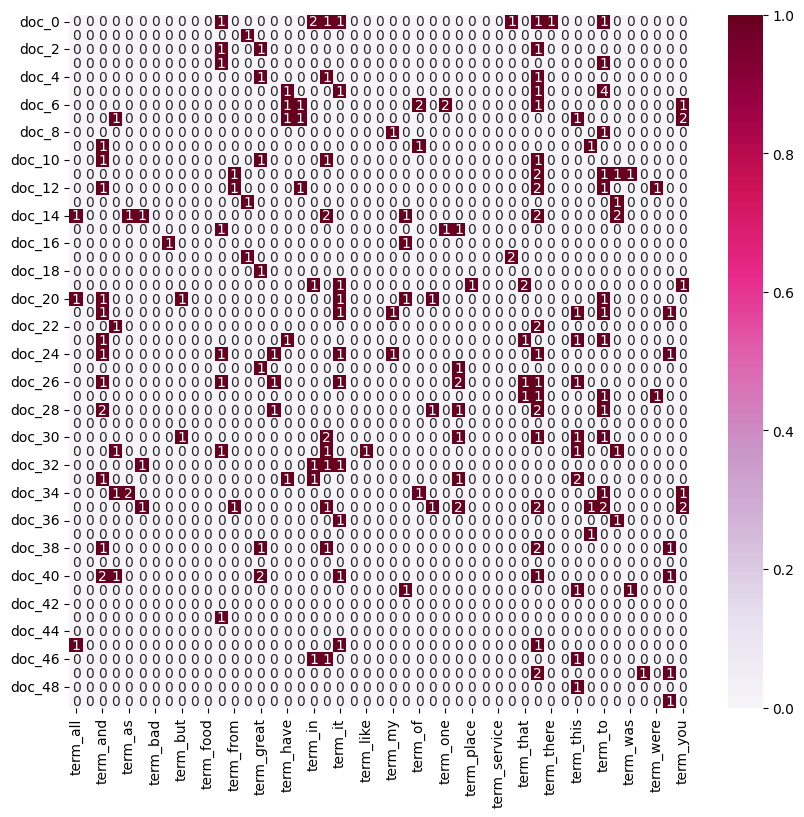

In [77]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction (PCA)

In [78]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

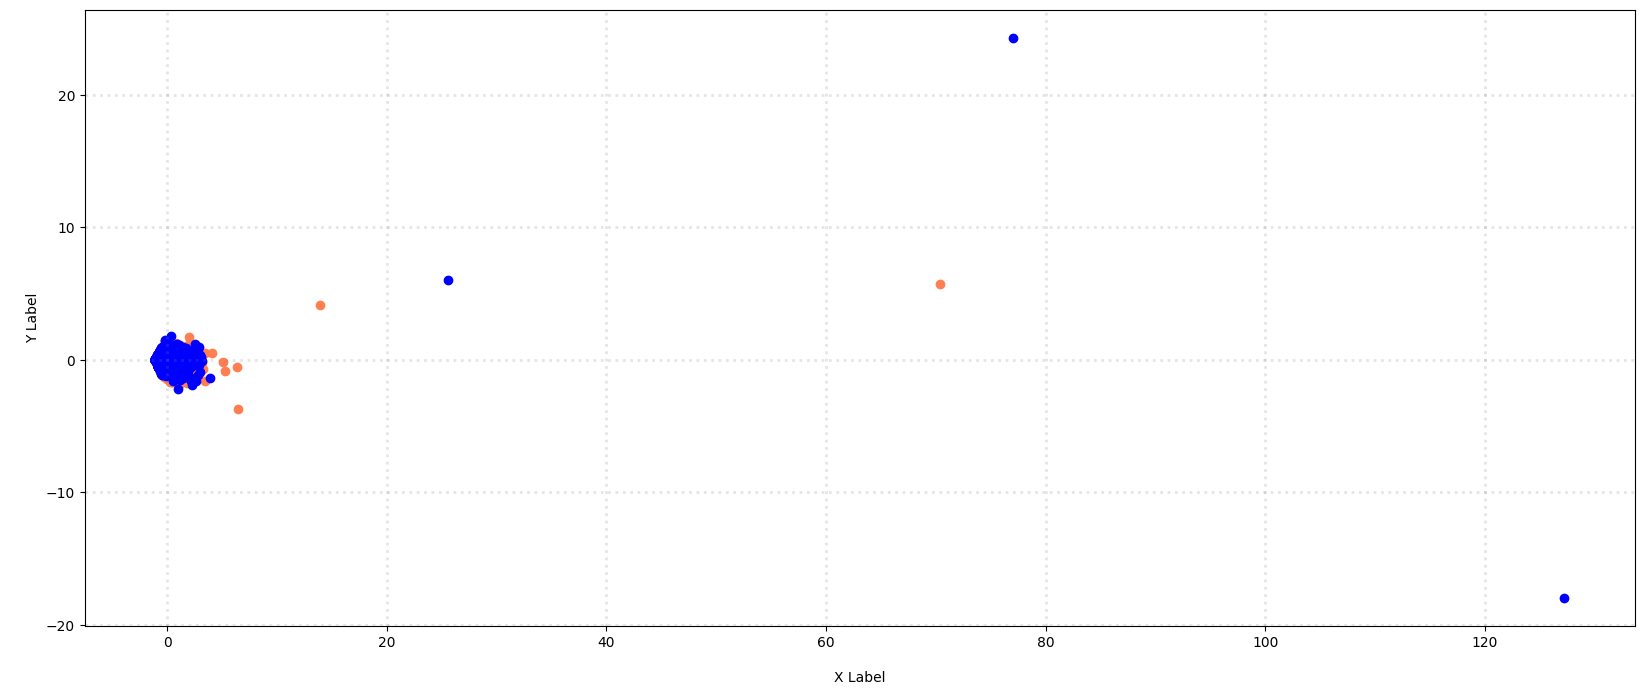

In [80]:
col = ['coral', 'blue']
labels=[1,0]

# plot
fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = df_reduced[df_all['label'] == label].T[0]
    ys = df_reduced[df_all['label'] == label].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2731, 5155)
(2731, 3)
1376
1376
1376
1355
1355
1355


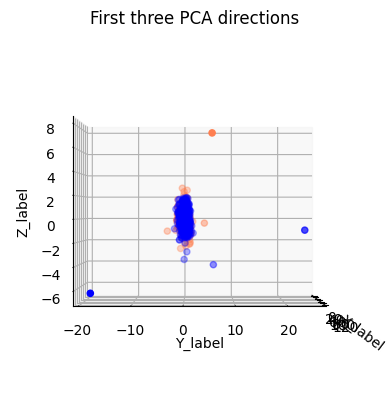

In [85]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

print(df_counts.shape)
df_reduced_3 = PCA(n_components = 3).fit_transform(df_counts.toarray())
print(df_reduced_3.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

col = ['coral', 'blue', 'black', 'm']
for c, label in zip(col, labels):
    
    xs = df_reduced_3[df_all['label'] == label].T[0]
    ys = df_reduced_3[df_all['label'] == label].T[1]
    zs = df_reduced_3[df_all['label'] == label].T[2] 
    print(len(xs))
    print(len(ys))
    print(len(zs))
    ax.scatter(xs, ys, zs, c=c,marker='o')
    
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.set_ylabel("Y_label")
ax.set_zlabel("Z_label")

ax.view_init(0, 0) 

plt.show()

(2731, 5155)
(2731, 3)
1376
1376
1376
1355
1355
1355


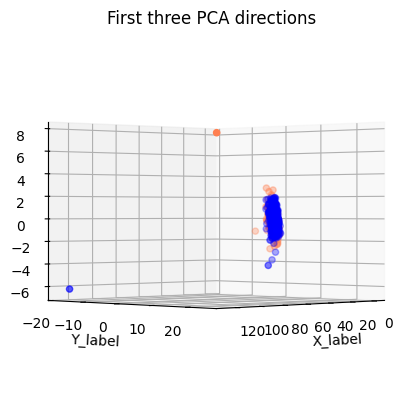

In [90]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

print(df_counts.shape)
df_reduced_3 = PCA(n_components = 3).fit_transform(df_counts.toarray())
print(df_reduced_3.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

col = ['coral', 'blue', 'black', 'm']
for c, label in zip(col, labels):
    
    xs = df_reduced_3[df_all['label'] == label].T[0]
    ys = df_reduced_3[df_all['label'] == label].T[1]
    zs = df_reduced_3[df_all['label'] == label].T[2] 
    print(len(xs))
    print(len(ys))
    print(len(zs))
    ax.scatter(xs, ys, zs, c=c,marker='o')
    
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.set_ylabel("Y_label")
ax.set_zlabel("Z_label")

ax.view_init(0, 45) 

plt.show()

(2731, 5155)
(2731, 3)
1376
1376
1376
1355
1355
1355


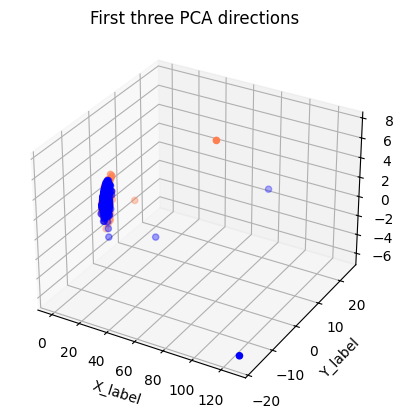

In [88]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

print(df_counts.shape)
df_reduced_3 = PCA(n_components = 3).fit_transform(df_counts.toarray())
print(df_reduced_3.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

col = ['coral', 'blue', 'black', 'm']
for c, label in zip(col, labels):
    
    xs = df_reduced_3[df_all['label'] == label].T[0]
    ys = df_reduced_3[df_all['label'] == label].T[1]
    zs = df_reduced_3[df_all['label'] == label].T[2] 
    print(len(xs))
    print(len(ys))
    print(len(zs))
    ax.scatter(xs, ys, zs, c=c,marker='o')
    
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.set_ylabel("Y_label")
ax.set_zlabel("Z_label")


plt.show()

### Draw Bar Chart

In [94]:
term_frequencies = df_counts.toarray().sum(axis=0)

/var/folders/8b/j09ck7f968l36p3pvm_8vz2w0000gn/T/ipykernel_90395/2941537120.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


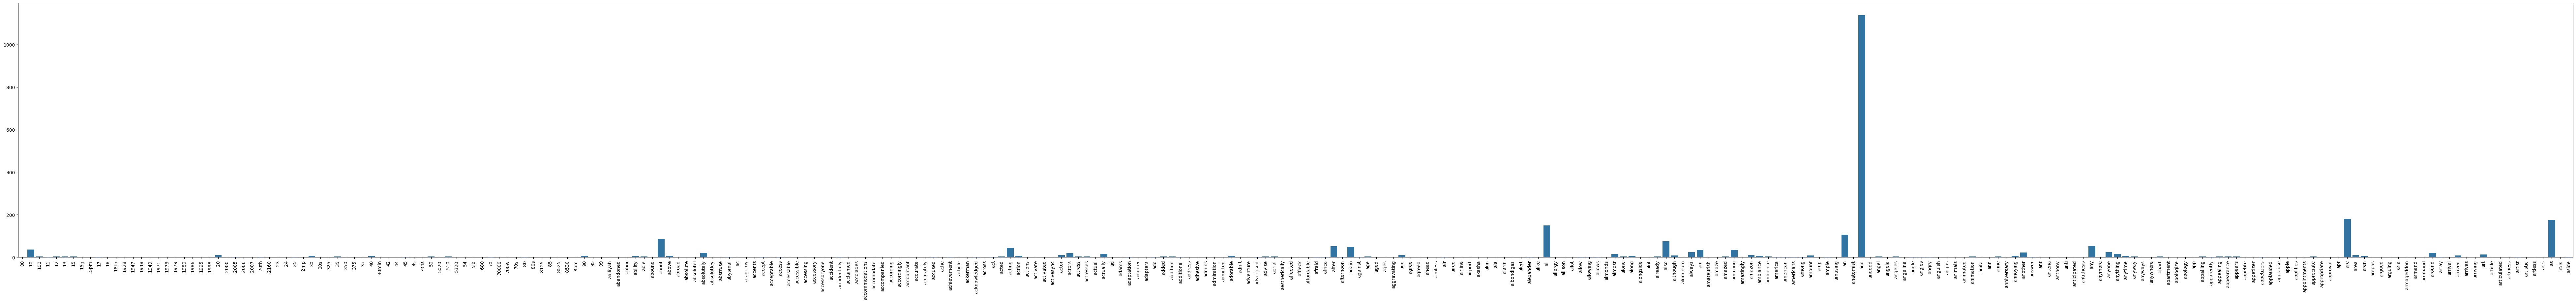

In [95]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x = count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

/var/folders/8b/j09ck7f968l36p3pvm_8vz2w0000gn/T/ipykernel_90395/1547745848.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(name, rotation = 90);


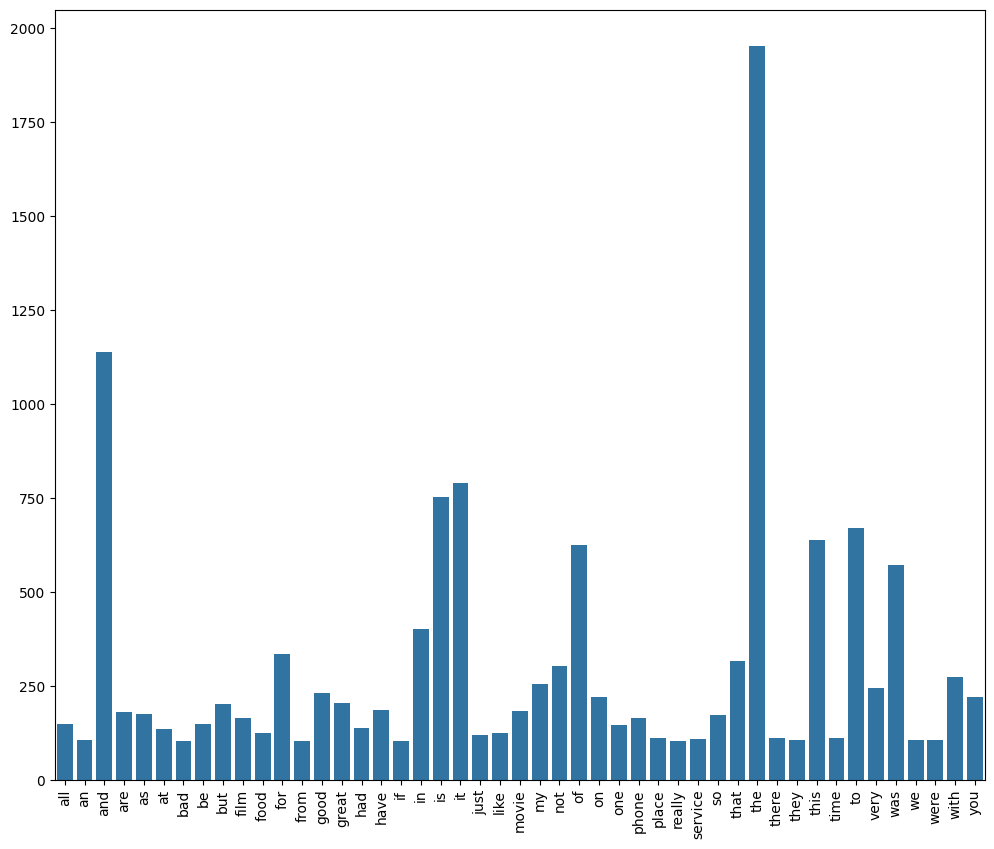

In [96]:
# 大於100的term留著
term_sum = df_counts.toarray().sum(axis=0)
term_filter=term_sum>100

index=[]
for i in enumerate(term_filter):
    if i[1]==True:
        index.append(i[0])

name=[]
for i in index:
    name.append(count_vect.get_feature_names_out()[i])

    
value=[]
for i in index:
    value.append(term_sum[i])

plt.subplots(figsize=(12, 10))
g = sns.barplot(x=name, 
            y=value)
g.set_xticklabels(name, rotation = 90);

/var/folders/8b/j09ck7f968l36p3pvm_8vz2w0000gn/T/ipykernel_90395/4016730129.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df_sort_100['name'], rotation = 90);


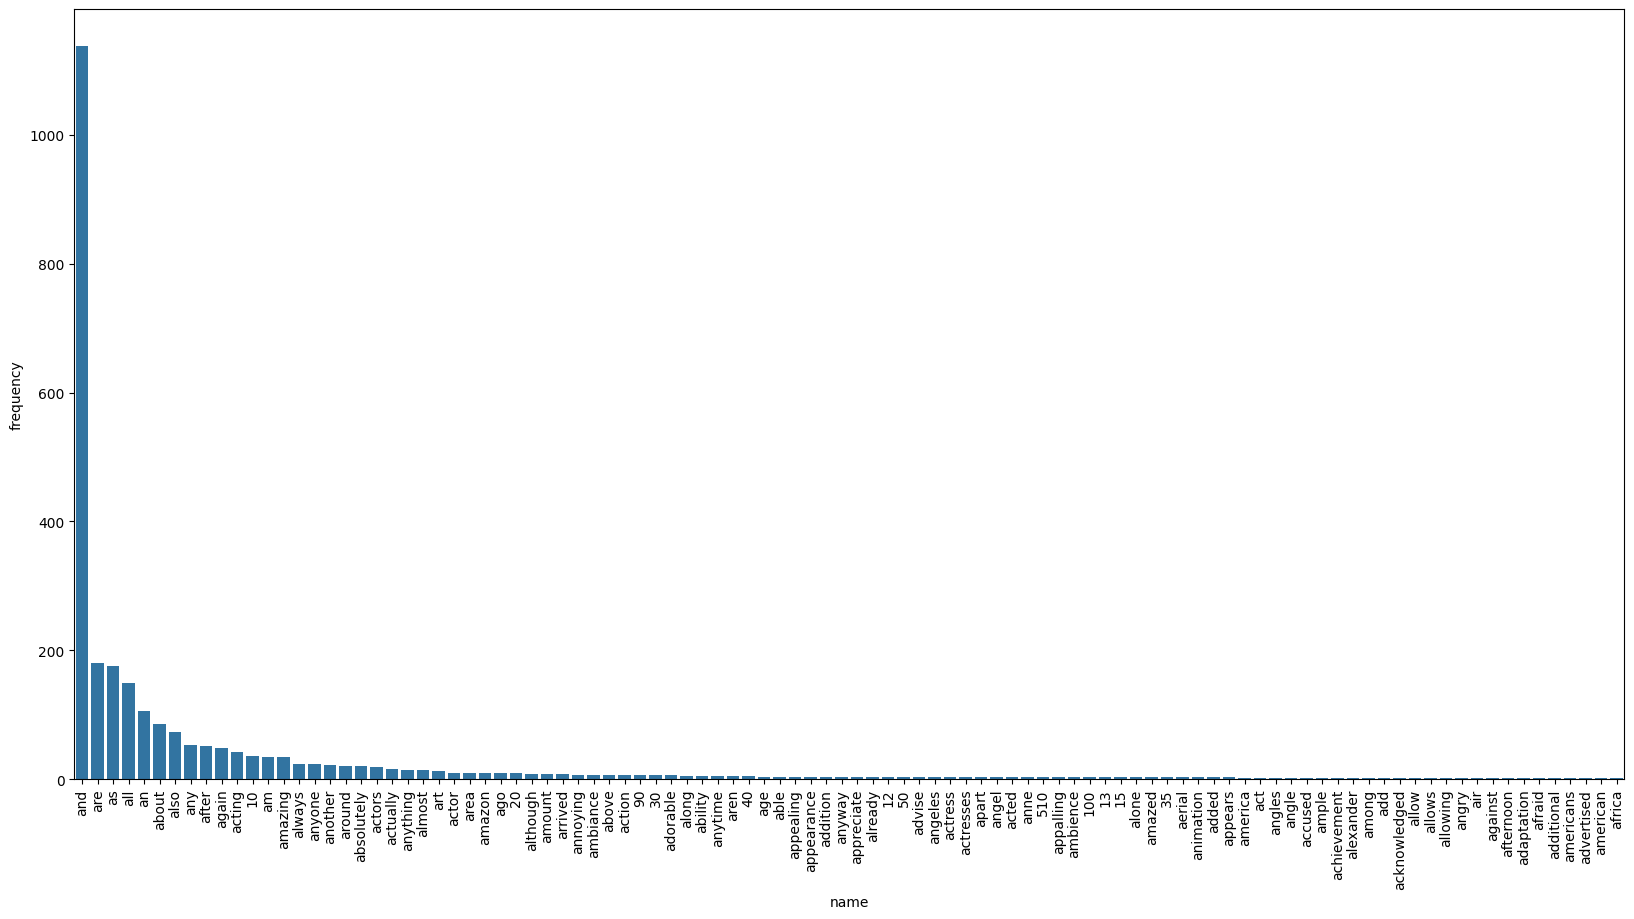

In [97]:
df_sort = pd.DataFrame({'name':count_vect.get_feature_names_out()[:300],'frequency':term_frequencies[:300]})
df_sort.sort_values(ascending=False,by='frequency',inplace=True)
df_sort_100 = df_sort.iloc[0:100,:]

plt.subplots(figsize=(20, 10))
g = sns.barplot(x = df_sort_100['name'],y=df_sort_100['frequency'])
g.set_xticklabels(df_sort_100['name'], rotation = 90);

### Discretization and Binarization

In [99]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_all["label"])
df_all['binarizer_label'] = mlb.transform(df_all['label']).tolist()

In [101]:
df_all.head()

,text,label,unigrams,binarizer_label
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]


### Data Exploration

In [102]:
# We retrieve 3 sentences for a random record, here, indexed at 123,132 and 233
document_to_transform_1 = []
random_record_1 = df_all.iloc[123]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_all.iloc[132]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_all.iloc[233]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [103]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Bad Quality.']
['Headset works great & was packaged nicely to avoid any damage.']
['Great sound and service.']


In [104]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [105]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.158114
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/8b/j09ck7f968l36p3pvm_8vz2w0000gn/T/ipykernel_90395/1414267526.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/8b/j09ck7f968l36p3pvm_8vz2w0000gn/T/ipykernel_90395/1414267526.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/8b/j09ck7f968l36p3pvm_8vz2w0000gn/T/ipykernel_90395/1414267526.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single ele